In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species_df = pd.read_csv(r"C:\Users\kenny\Documents\GitHub\Biodiversity_in_National_Parks\biodiversity_starter\species_info.csv")
observations_df = pd.read_csv(r"C:\Users\kenny\Documents\GitHub\Biodiversity_in_National_Parks\biodiversity_starter\observations.csv")

species_df.info()
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print(f"Conservation Status:{species_df.conservation_status.unique()}")

Conservation Status:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


As lack of conservation status in this database implies no known conservation efforts...

In [6]:
species_df.conservation_status=species_df.conservation_status.fillna('No Human Intervention')
species_df

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Human Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Human Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Human Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Human Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Human Intervention
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Human Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Human Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Human Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Human Intervention


In [7]:
print(f"Categories:{species_df.category.unique()}")

Categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
print(f"Number of Species:{species_df.scientific_name.nunique()}")

Number of Species:5541


In [9]:
species_df.groupby("conservation_status").size()

conservation_status
Endangered                 16
In Recovery                 4
No Human Intervention    5633
Species of Concern        161
Threatened                 10
dtype: int64

In [45]:
conservationCategory = species_df[species_df.conservation_status != "No Human Intervention"]\
    .groupby(["category", "conservation_status"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


In [48]:
conservationCategory = conservationCategory[['Species of Concern', 'Threatened', 'Endangered','In Recovery']]

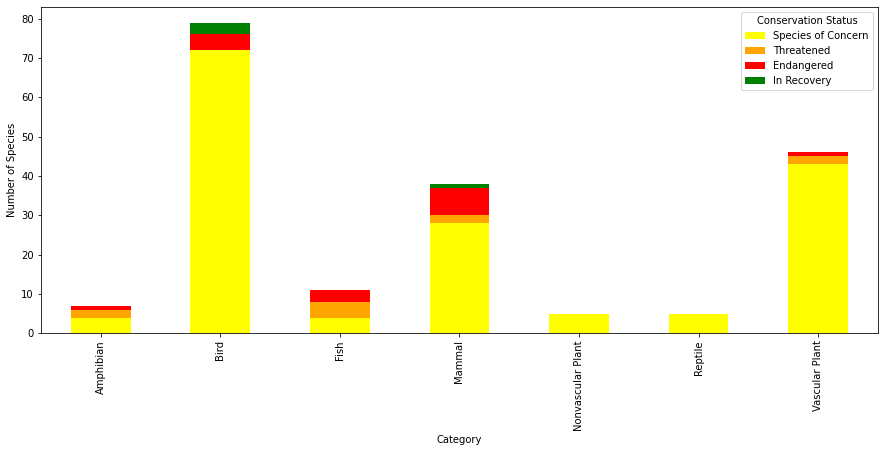

In [50]:
ax = conservationCategory.plot(kind = 'bar', stacked=True, figsize=(15,6), color=['yellow', 'orange', 'red', 'green'])
ax.set_xlabel("Category")
ax.set_ylabel("Number of Species")
ax.legend(title='Conservation Status')

In [57]:
species_df['protected'] = species_df.conservation_status != 'No Human Intervention'

category_counts = species_df.groupby(['category', 'protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

category_counts.columns = ['Category', 'Unprotected', 'Protected']

category_counts['% Protected'] = category_counts.Protected / \
                                      (category_counts.Protected + category_counts.Unprotected) * 100

category_counts

,Category,Unprotected,Protected,% Protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Chi Squared Tests of the Statistical Significance in Higher Rates of Protection Required

In [58]:
from scipy.stats import chi2_contingency

#### Mamals vs Birds

In [60]:
chi2_contingency([[30, 146], [75, 413]])

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

#### Mamals vs Amphibians

In [61]:
chi2_contingency([[30, 146], [7, 72]])

(2.321746712946015,
 0.12757669693198975,
 1,
 array([[ 25.5372549, 150.4627451],
        [ 11.4627451,  67.5372549]]))

#### Mamals vs Reptiles  -- showing mammals higher requirement of protection than reptiles, is statistically significant to a 95% confidence level

see the second output for the p-value <0.05

In [62]:
chi2_contingency([[30, 146], [5, 73]])

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

### To look for the most prevalent animals in the observations

In [63]:
from itertools import chain
import string

In [71]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species_df[species_df.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
words = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
words[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

In [73]:
words_counted = []

for word in words:
    num = words.count(word)
    words_counted.append((word,num))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
34,Bat,23
113,Shrew,18
100,Myotis,17
118,Mouse,16
85,Chipmunk,13
105,Squirrel,12
8,American,12
84,Eastern,11
21,Vole,11
57,Mountain,10


In [90]:
species_df['Bat'] = species_df.common_names.str.contains(r"\bBat\b", regex = True)

species_df[species_df.Bat==True].reset_index()

,index,category,scientific_name,common_names,conservation_status,protected,Bat
0,28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Human Intervention,False,True
1,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
2,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
3,31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Human Intervention,False,True
4,32,Mammal,Lasiurus cinereus,Hoary Bat,No Human Intervention,False,True
5,36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
6,37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
7,38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
8,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
9,40,Mammal,Nycticeius humeralis,Evening Bat,No Human Intervention,False,True


In [88]:
bat_sightings = observations_df.merge(species_df[species_df.Bat])

bat_sightings

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,Bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Human Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


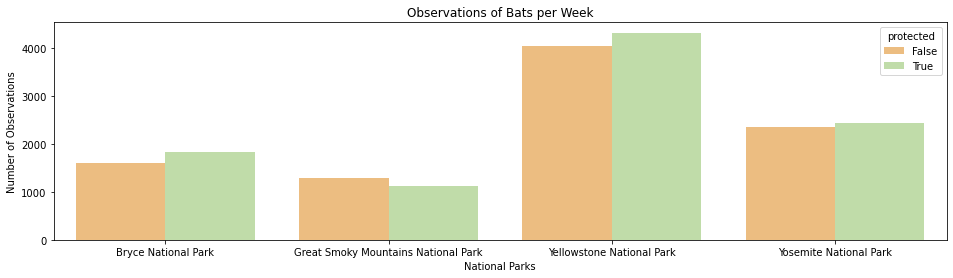

In [97]:
Bats_by_park = bat_sightings.groupby(['park_name', 'protected']).observations.sum().reset_index()

plt.figure(figsize=(16, 4))
sns.barplot(x=Bats_by_park.park_name, y= Bats_by_park.observations, hue=Bats_by_park.protected, palette="Spectral")
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()